# Getting Started with ggplot2 in R: A Hands-on Tutorial

------------------------

Welcome to the ggplot2 module in our Data Analysis and Visualization series. In this module, we'll dive into the powerful `ggplot2` package for creating advanced visualizations in R.

## Learning Objectives

After completing this module, you will be able to:

1. [Understand the Grammar of Graphics](#grammar)
   - Explain the core components of ggplot2
   - Understand the layered approach to building plots
   - Differentiate between data, aesthetics, and geometrie
3. [Work with Data Formats](#data-formats)
   - Convert between wide and long data formats
   - Understand why ggplot2 prefers long format
   - Prepare your data for effective visualization
4. [Create Basic Plots](#basic-plots)
   - Build scatter plots, line plots, and bar charts
   - Map variables to visual elements (color, size, shape)
   - Add trend lines and statistical summaries
5. [Customize Visualizations](#customization)
   - Apply and modify themes
   - Control plot dimensions and resolution
   - Adjust scales and legends
   - Create publication-ready graphics
6. [Create Complex Visualizations](#complex-visualizations)
   - Combine multiple geometries in one plot
   - Create faceted (small multiple) plots
   - Handle grouped data effectively
   - Build multi-panel figures
7. [Best Practices](#best-practices)
   - Choose appropriate plot types for different data
   - Ensure readability and accessibility
   - Follow visualization best practices
   - Format plots for different contexts (presentation, publication)
8. [Practical Exercises](#exercises)

9. [Quiz](#quiz)

---

<a id='grammar'></a>
## 1. Understanding the Grammar of Graphics

### What is ggplot2?

`ggplot2` is a data visualization package for the statistical programming language R. It is based on the Grammar of Graphics, which provides a coherent system for describing and building graphs. With `ggplot2`, you can create complex plots from data in a data frame.

### Why ggplot2 for Scientific Visualization?

`ggplot2` has become the go-to tool for scientific visualization in R for several compelling reasons:

1. **Consistent Grammar**: Based on the "Grammar of Graphics," `ggplot2` provides a coherent system for describing visualizations. Once you learn the basic principles, you can create virtually any type of plot using the same consistent syntax.

2. **Publication-Ready Quality**: 
   - Produces high-quality graphics suitable for academic publications.
   - Offers fine-grained control over every visual element.
   - Supports proper scientific notation and mathematical expressions.
   - Enables easy creation of multi-panel figures.

3. **Statistical Integration**:
   - Built-in statistical transformations.
   - Easy addition of error bars, confidence intervals, and trend lines.
   - Seamless integration with statistical models.

4. **Reproducibility**:
   - Code-based approach ensures reproducible figures.
   - Easy to version control and share with collaborators.
   - Consistent output across different platforms.

### Core Components of ggplot2

1. **Data**: The dataset being visualized.
2. **Aesthetics (aes)**: Mappings from data to visual properties like x/y position, color, and size.
3. **Geometries (geoms)**: The visual elements that represent data points (e.g., points, lines, bars).
4. **Facets**: For creating small multiples of plots based on a factor variable.
5. **Statistics**: Statistical transformations like smoothing or binning.
6. **Coordinates**: Coordinate system (e.g., Cartesian, polar).
7. **Themes**: Control non-data ink like backgrounds and gridlines.

---

## Resources and Inspiration

Here are some invaluable resources for your ggplot2 journey:

1. **[The R Graph Gallery](https://r-graph-gallery.com/)**
   - Comprehensive collection of R charts.
   - Code examples for each visualization.
   - Organized by chart type.
   - Special sections for ggplot2 implementations.
   
2. **Finding Inspiration**:
   - [ggplot2 Extensions Gallery](https://exts.ggplot2.tidyverse.org/gallery/)
   - [Cedric Scherer's Gallery](https://www.cedricscherer.com/2019/08/05/a-ggplot2-tutorial-for-beautiful-plotting-in-r/)
   - [Top 50 ggplot2 Visualizations](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)

---

<a id='data-formats'></a>
## 2. Install Packages and Load Libraries

Before we start, we need to install and load the necessary packages.

In [1]:
# Suppress warnings and messages
options(warn=-1)  # Suppress warnings
options(message=FALSE)  # Suppress messages

# Install and load required packages
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(palmerpenguins)) install.packages("palmerpenguins")
if (!require(ggthemes)) install.packages("ggthemes")

# Load libraries
library(tidyverse)
library(palmerpenguins)
library(ggthemes)

# Load the dataset
data(penguins)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: palmerpenguins

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggthemes

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



<a id='basic-plots'></a>
## 3. Understanding Our Data: The Palmer Penguins Dataset

### Dataset Background

The Palmer Penguins dataset comes from Dr. Kristen Gorman and colleagues' research at Palmer Station, Antarctica. It includes measurements from three penguin species observed on three islands in the Palmer Archipelago between 2007 and 2009.

The dataset is an excellent alternative to the commonly used iris dataset for data visualization and analysis because:
- It features real-world measurements.
- Contains categorical and numerical variables.
- Includes missing values (common in real research).
- Tells an engaging story about ecological research.

### Dataset Structure

Let's examine our data:

In [2]:
# Look at the first few rows
head(penguins)


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [3]:
# Get a summary of the data
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

### Variables in the Dataset

Our dataset contains the following variables:

**Categorical Variables:**
- `species`: Penguin species (Adelie, Chinstrap, Gentoo).
- `island`: Location where observed (Biscoe, Dream, or Torgersen).
- `sex`: Sex of the penguin (female, male).

**Numerical Variables:**
- `bill_length_mm`: Length of the bill in millimeters.
- `bill_depth_mm`: Depth of the bill in millimeters.
- `flipper_length_mm`: Length of the flipper in millimeters.
- `body_mass_g`: Body mass in grams.
- `year`: Year of observation (2007, 2008, 2009).

---

<a id='data-formats'></a>
## 4. Understanding Data Format for ggplot2: From Excel to R

### The Excel Way (Wide Format)

Most people store their data like a typical spreadsheet. Let's look at a simple example of student test scores across different months:

Think of how you'd typically see this in Excel:

In [4]:
# Create an Excel-like dataframe
wide_scores <- data.frame(
    Student = c("Alice", "Bob", "Charlie"),
    January = c(85, 92, 78),
    February = c(88, 95, 82),
    March = c(90, 88, 85)
)

# Show the Excel-style (wide) format
wide_scores

Student,January,February,March
<chr>,<dbl>,<dbl>,<dbl>
Alice,85,88,90
Bob,92,95,88
Charlie,78,82,85


This format is intuitive for viewing and data entry - each student has one row, and their scores are spread across columns by month.

### Why ggplot2 Needs a Different Format

Imagine you want to create a plot showing how scores change over time. With this format, you'd need to answer:
- What goes on the x-axis?
- What goes on the y-axis?
- How do you tell ggplot which columns are the months?

ggplot2 works best when your data has:
1. One column for the thing you're measuring (scores).
2. One column for when you measured it (month).
3. One column for who you measured it from (student).

Let's see how this looks:

In [5]:
# Convert to the format ggplot2 prefers
long_scores <- wide_scores %>%
    pivot_longer(
        cols = January:March,
        names_to = "Month",
        values_to = "Score"
    )

# Show the ggplot2-friendly (long) format
long_scores

Student,Month,Score
<chr>,<chr>,<dbl>
Alice,January,85
Alice,February,88
Alice,March,90
Bob,January,92
Bob,February,95
Bob,March,88
Charlie,January,78
Charlie,February,82
Charlie,March,85


Now each row represents one score for one student in one month. This might look repetitive, but it makes plotting much easier because:
1. Every measurement has its own row.
2. Each column represents a single type of information.

### Key Points to Remember:

1. **Excel Format (Wide)**
   - Each row is one entity (one student, one city).
   - Measurements spread across columns.
   - Easy for data entry.
   - Good for viewing individual records.

2. **ggplot2 Format (Long)**
   - Each row is one measurement.
   - Clear columns for:
     - What you measured (scores, temperature).
     - When/where you measured it (month, time of day).
     - Who/what you measured it from (student, city).
   - Perfect for visualization.
   - Makes it easy to:
     - Compare across categories.
     - Show changes over time.
     - Group by different variables.

---

<a id='basic-plots'></a>
## 5. Let's Start with a Simple Example

Before diving deep into ggplot2, let's create a basic visualization to see the power of the grammar of graphics approach. We'll use the Palmer Penguins dataset, which contains measurements from three penguin species.

Below, we'll create a scatter plot showing the relationship between flipper length and body mass of penguins.

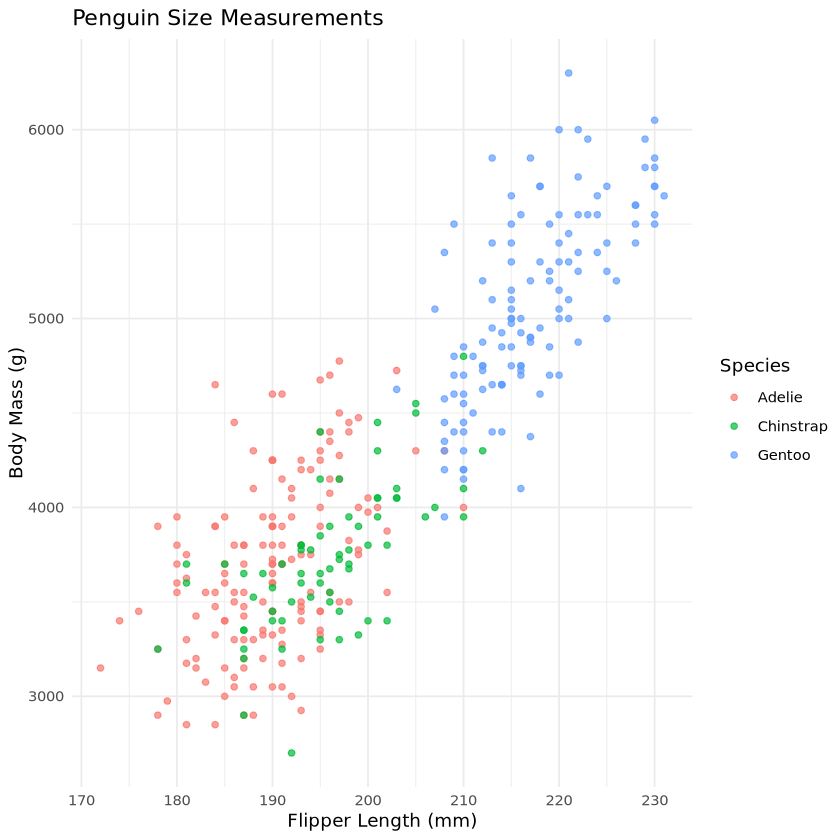

In [6]:
# Create our first plot
ggplot(penguins, 
       aes(x = flipper_length_mm, 
           y = body_mass_g, 
           color = species)) +
  geom_point(alpha = 0.7) +
  theme_minimal() +
  labs(title = "Penguin Size Measurements",
       x = "Flipper Length (mm)",
       y = "Body Mass (g)",
       color = "Species")

This first visualization already shows us several key features of ggplot2:
- **Clear mapping of variables to visual elements**: x-axis, y-axis, color.
- **Automatic legend creation**: ggplot2 adds a legend based on the aesthetics.
- **Built-in themes for professional appearance**: `theme_minimal()` provides a clean look.
- **Proper handling of missing values**: ggplot2 handles `NA` values gracefully.
- **Automatic scaling of axes**: Scales are adjusted based on the data range.

---

<a id='customization'></a>
## 6. Understanding ggplot2 Basics

### The Grammar of Graphics

ggplot2 is based on the "Grammar of Graphics," which breaks down every visualization into basic components. Think of it like building with LEGO blocks—you start with a base and add pieces one by one.

### Building Plots Layer by Layer

One of ggplot2's most powerful features is the ability to add layers. Each layer adds new information or visual elements to your plot. Let's build up a plot step by step.

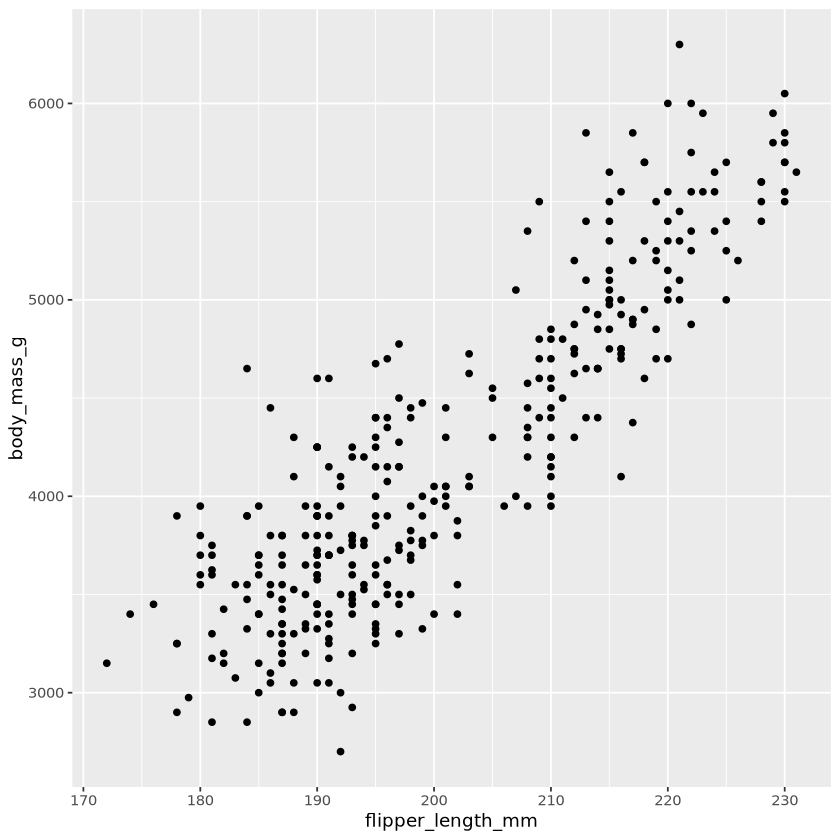

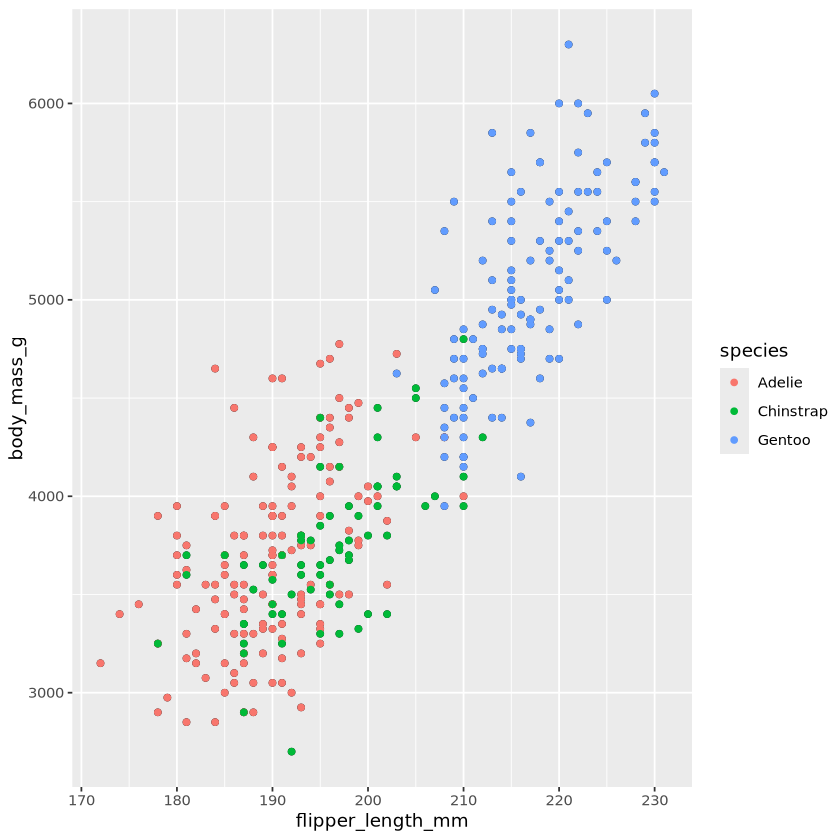

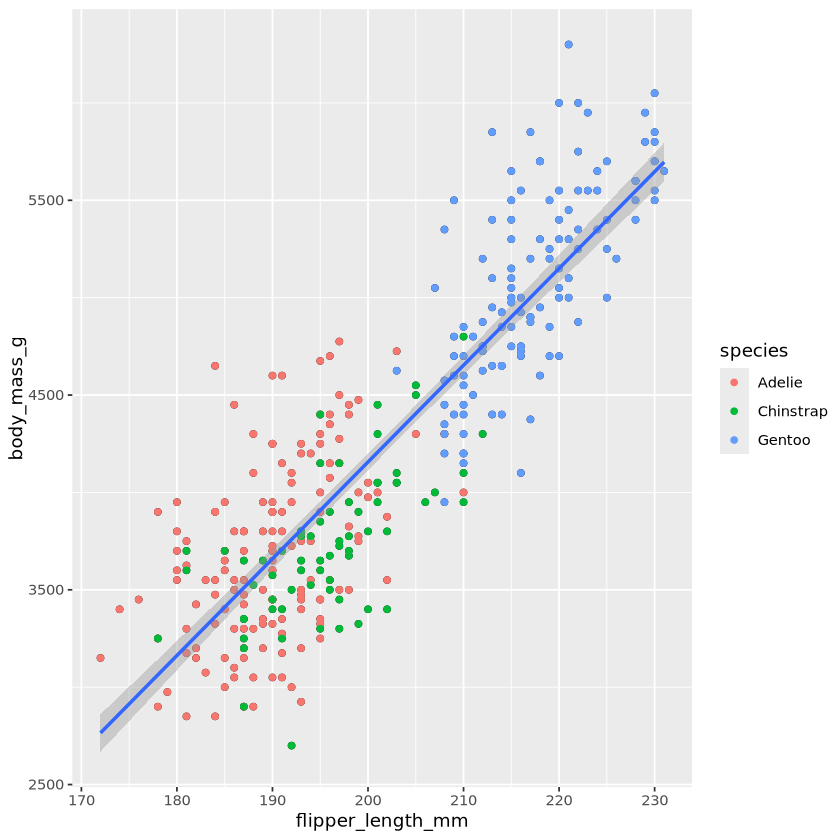

In [18]:
# Start with basic scatter plot
p1 <- ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point()

# Add color by species
p2 <- p1 + geom_point(aes(color = species))

# Add trend line
p3 <- p2 + geom_smooth(formula = y ~ x, method = "lm")

# Display the plots
p1
p2
p3

### Understanding Aesthetics (aes)

Aesthetics are the visual properties of your plot. Common aesthetics include:

- `x`: x-axis position.
- `y`: y-axis position.
- `color`: point or line color.
- `fill`: fill color for areas.
- `size`: size of points.
- `shape`: shape of points.
- `alpha`: transparency.

You can set aesthetics in two ways:
1. **Map them to variables** (inside `aes()`): Dynamic, changes based on data.
2. **Set them to fixed values** (outside `aes()`): Static, remains constant.

#### Example: Mapping vs. Setting

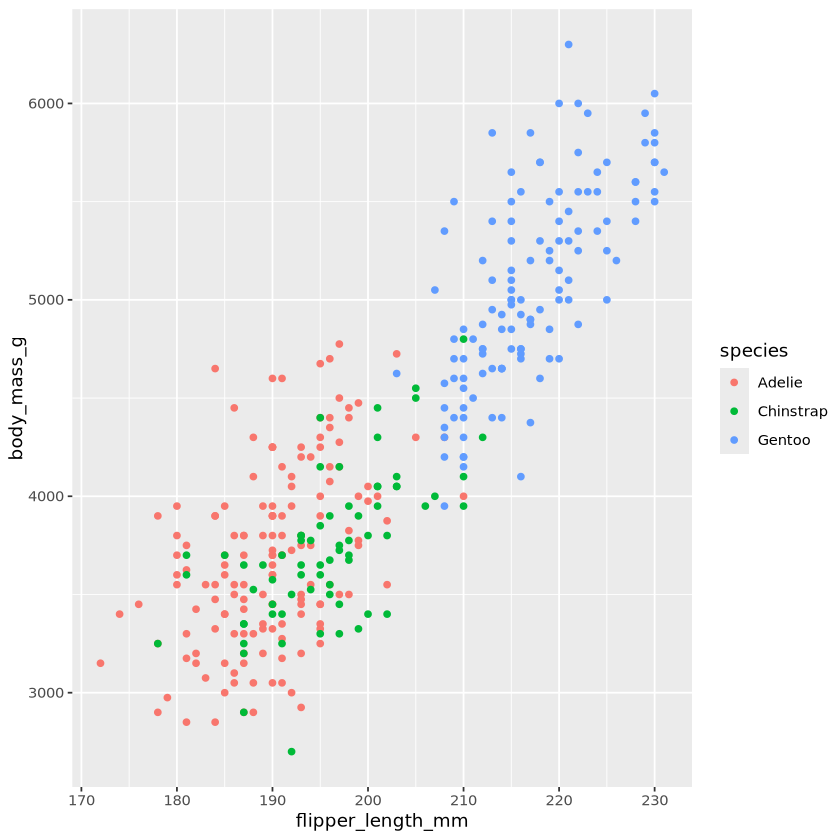

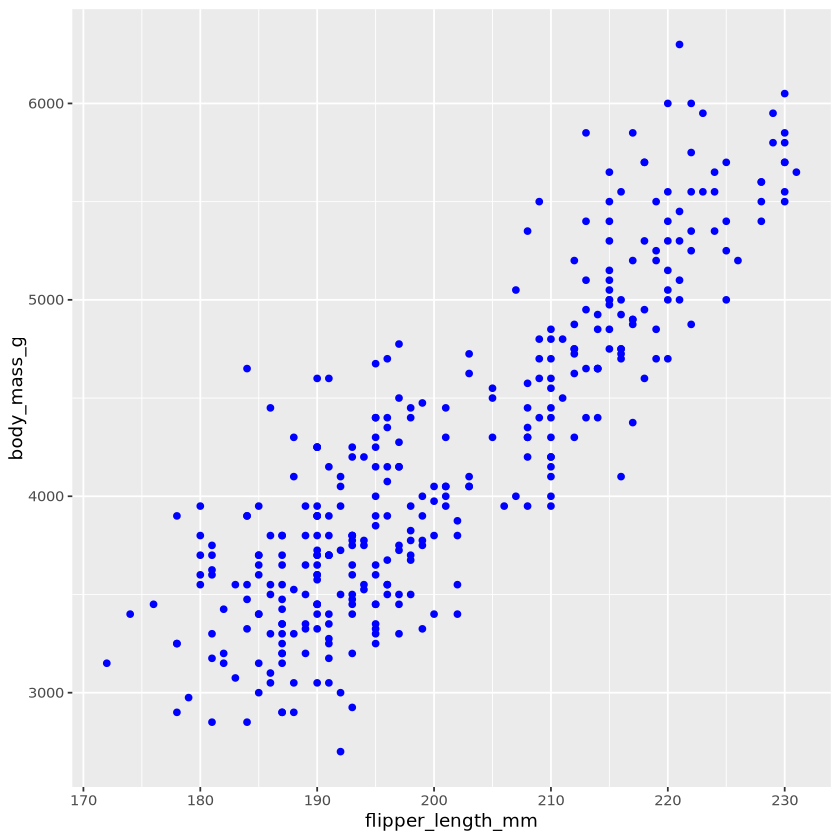

In [8]:
# Mapping color to a variable
p4 <- ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point(aes(color = species))  # Color varies by species

# Setting a fixed color
p5 <- ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point(color = "blue")  # All points are blue

# Display both plots
p4
p5

### Practice Exercise: Exploring Aesthetics

Try creating your own plots by modifying the code below. Some ideas:
1. Change which variables are on the x and y axes.
2. Map different variables to color.
3. Try using size or shape instead of color.
4. Add a different type of geometry (like `geom_line()` or `geom_smooth()`).

#### Template for Practice
```r
ggplot(penguins, aes(x = ___, y = ___)) +
  geom_point(aes(color = ___))
```

<a id='exercises'></a>
## 7. Practical Exercises

### Exercise 1: Exploring Aesthetics

**Task**: Create a scatter plot of `bill_length_mm` vs. `bill_depth_mm`, colored by `species`. Add a linear trend line for each species.

#### Your Code Here

In [9]:
# Your code here

<details>
<summary><strong>Hint:</strong> Click to expand</summary>

- Use `ggplot()` with `aes(x = bill_length_mm, y = bill_depth_mm)`.
- Map `species` to `color` inside `aes()`.
- Add `geom_point()` for the scatter plot.
- Add `geom_smooth(method = "lm")` for the trend lines.

</details>

<details>
<summary><strong>Solution:</strong> Click to expand</summary>

```R
# Solution
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Bill Dimensions by Species",
       x = "Bill Length (mm)",
       y = "Bill Depth (mm)",
       color = "Species") +
  theme_minimal()
```

</details>

<a id='complex-visualizations'></a>
## 8. Common Chart Types in ggplot2

Let's explore different types of visualizations and when to use them.

### 1. Bar Charts

Use bar charts when you want to:
- Show counts of categorical variables.
- Compare quantities across groups.
- Display proportions.

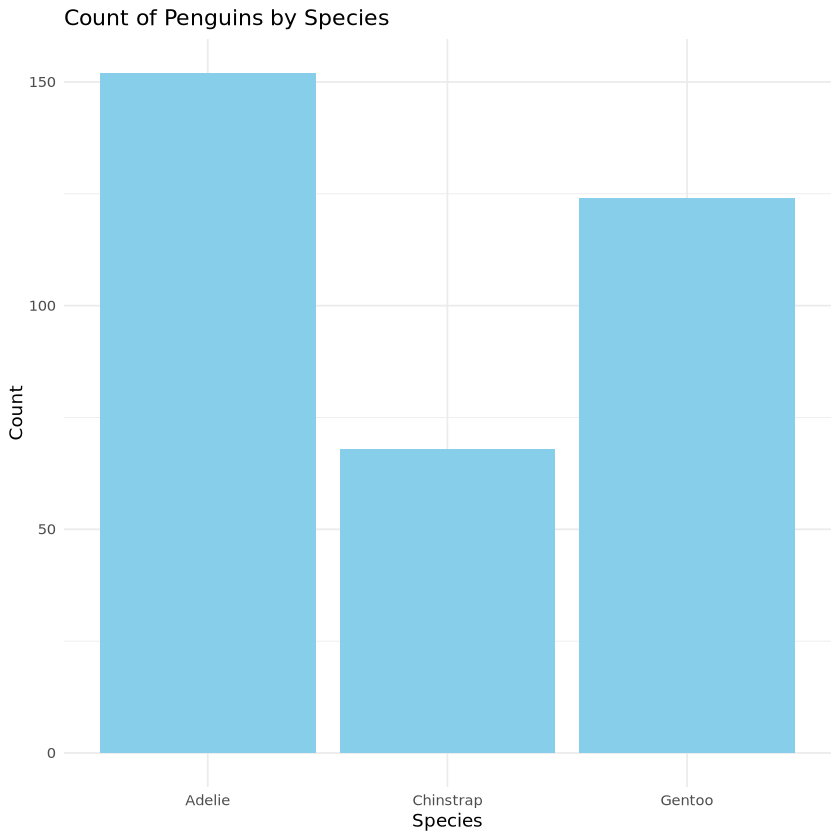

In [10]:
# Basic bar chart
ggplot(penguins, aes(x = species)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Count of Penguins by Species",
       x = "Species",
       y = "Count") +
  theme_minimal()

### Exercise 2: Creating a Stacked Bar Chart

**Task**: Create a stacked bar chart showing the count of penguins by `species`, filled by `island`.

#### Your Code Here

In [11]:
# Your code here

<details>
<summary><strong>Hint:</strong> Click to expand</summary>

- Use `geom_bar()` with `aes(fill = island)`.
- Map `species` to the x-axis.

</details>

<details>
<summary><strong>Solution:</strong> Click to expand</summary>

```R
# Solution
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar() +
  labs(title = "Penguin Species by Island",
       x = "Species",
       y = "Count",
       fill = "Island") +
  theme_minimal()
```

</details>

### 2. Box Plots and Violin Plots

Use these when you want to:
- Show distribution of continuous data across categories.
- Compare medians and spread.
- Identify outliers.

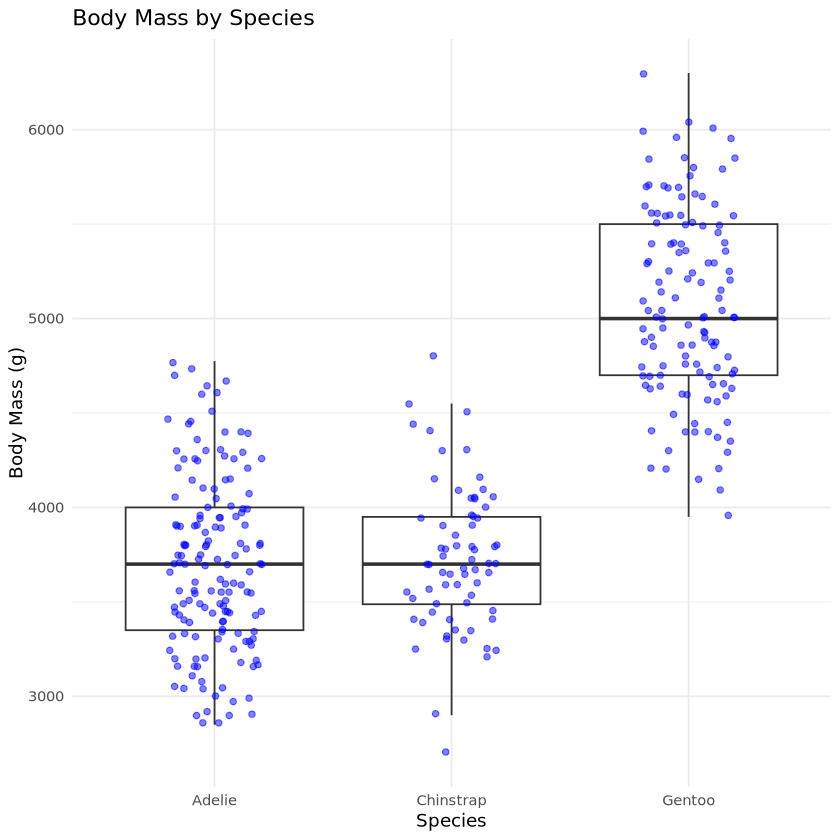

In [12]:
# Box plot with points
ggplot(penguins, aes(x = species, y = body_mass_g)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, color = "blue") +
  labs(title = "Body Mass by Species",
       x = "Species",
       y = "Body Mass (g)") +
  theme_minimal()

### Exercise 3: Creating a Violin Plot

**Task**: Create a violin plot of `flipper_length_mm` for each `species`, filled by `species`.

#### Your Code Here

In [13]:
# Your code here

<details>
<summary><strong>Hint:</strong> Click to expand</summary>

- Use `geom_violin()` with `aes(fill = species)`.
- Map `species` to the x-axis and `flipper_length_mm` to the y-axis.

</details>

<details>
<summary><strong>Solution:</strong> Click to expand</summary>

```R
# Solution
ggplot(penguins, aes(x = species, y = flipper_length_mm, fill = species)) +
  geom_violin(alpha = 0.5) +
  labs(title = "Flipper Length Distribution by Species",
       x = "Species",
       y = "Flipper Length (mm)") +
  theme_minimal()
```

</details>

<a id='best-practices'></a>
## 9. Understanding Themes in ggplot2

Themes control the non-data elements of your plot. This includes:
- Background colors and grids.
- Font sizes and types.
- Line sizes and colors.
- Spacing and margins.
- Legend appearance and placement.

### Built-in Themes

ggplot2 comes with several built-in themes. Here are some commonly used ones:
- `theme_gray()`: Default theme.
- `theme_bw()`: Black and white theme.
- `theme_minimal()`: Minimalistic theme.
- `theme_classic()`: Classic theme with x and y axis lines.
- `theme_void()`: A completely empty theme.

### Applying a Theme

You can apply a theme using the `+` operator.

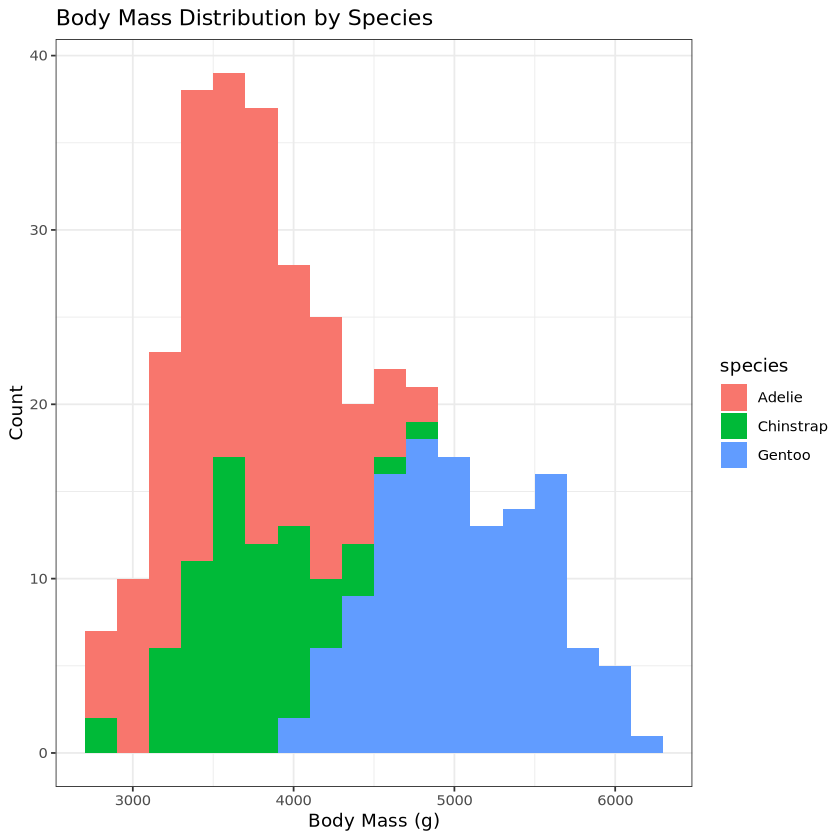

In [14]:
# Apply theme_bw()
ggplot(penguins, aes(x = body_mass_g, fill = species)) +
  geom_histogram(binwidth = 200) +
  labs(title = "Body Mass Distribution by Species",
       x = "Body Mass (g)",
       y = "Count") +
  theme_bw()

### Customizing Themes

You can modify specific elements of any theme using the `theme()` function. Common modifications include:

- **Text elements**: `axis.title`, `plot.title`, `legend.title`.
- **Grid lines**: `panel.grid.major`, `panel.grid.minor`.
- **Background**: `panel.background`, `plot.background`.
- **Legend position**: `legend.position`.

#### Example: Customizing Text Elements

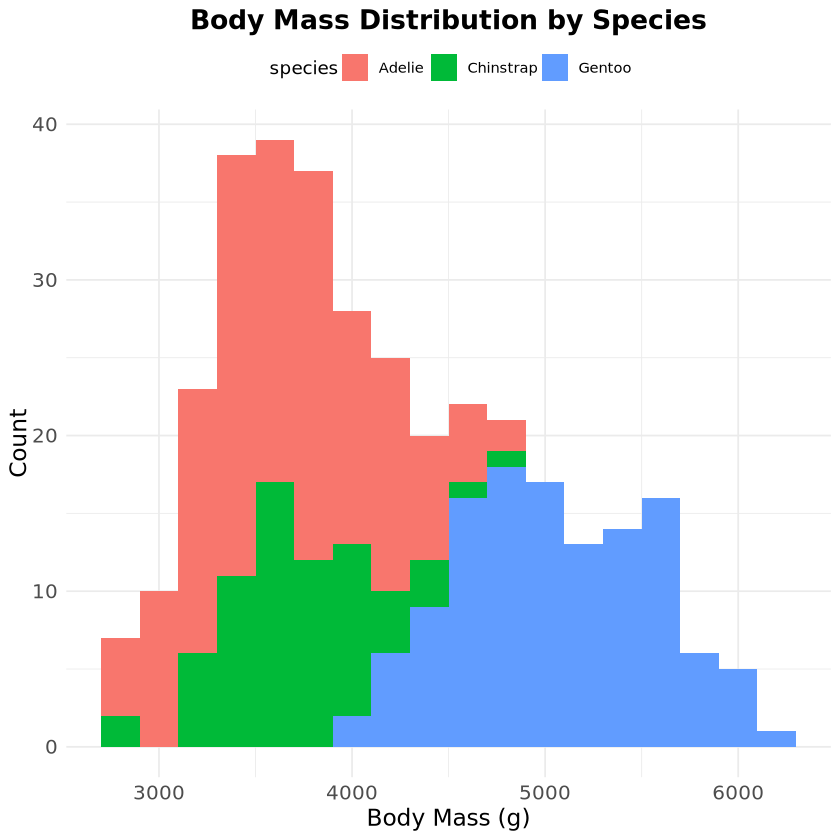

In [15]:
# Customize theme elements
ggplot(penguins, aes(x = body_mass_g, fill = species)) +
  geom_histogram(binwidth = 200) +
  labs(title = "Body Mass Distribution by Species",
       x = "Body Mass (g)",
       y = "Count") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "top"
  )

<a id='quiz'></a>
## 10. Conclusion

In this module, we've explored the basics of ggplot2, learned about the importance of data formats, and practiced creating and customizing various types of plots. ggplot2 is a powerful tool that, once mastered, can greatly enhance your data visualization capabilities.

---

If you have any questions or need further clarification, feel free to reach out!

---

**Next Steps**:

- Experiment with different datasets.
- Explore more geoms and statistical transformations.
- Learn about interactive plotting with packages like `plotly`.
- Dive deeper into custom themes and ggplot2 extensions.

---